<a href="https://colab.research.google.com/github/DaVinciAyo/data-science/blob/main/TASK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
import pandas as pd
import os

# Define the folder containing CSV files
folder_path = "/content/sample_data/POLICE REPORT 4Q"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Combine all CSV files
combined_file = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files])

# Save the combined CSV
combined_file.to_csv("police3q.csv", index=False)

print("All CSV files have been combined into 'combined_output.csv'")


All CSV files have been combined into 'combined_output.csv'


In [ ]:
police= pd.read_csv("police3q.csv")
police.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,60592abd34c8311812da77a0cbb100a996d2fe545763ad...,2024-11,Merseyside Police,Merseyside Police,-3.074956,53.315654,On or near B5135,E01018537,Cheshire West and Chester 001D,Criminal damage and arson,Unable to prosecute suspect,NaN
1,de5440d1da52df8e893f4a0a38750fbc8e487fd5aeefcf...,2024-11,Merseyside Police,Merseyside Police,-3.074956,53.315654,On or near B5135,E01018537,Cheshire West and Chester 001D,Vehicle crime,Unable to prosecute suspect,NaN
2,NaN,2024-11,Merseyside Police,Merseyside Police,-2.989389,53.293347,On or near Heath Lane,E01018569,Cheshire West and Chester 004B,Anti-social behaviour,NaN,NaN
3,NaN,2024-11,Merseyside Police,Merseyside Police,-2.872892,53.488785,On or near Brook Hey Drive,E01006448,Knowsley 001A,Anti-social behaviour,NaN,NaN
4,b98f84c56eac55c68c78d0021e267551baa3a20245b010...,2024-11,Merseyside Police,Merseyside Police,-2.869654,53.486687,On or near Birbeck Road,E01006448,Knowsley 001A,Burglary,Investigation complete; no suspect identified,NaN


In [ ]:
#statistics summary of the data
police.describe()

,Longitude,Latitude,Context
count,115028.000000,115028.000000,0.0
mean,-3.163290,52.689630,NaN
std,0.635498,0.875910,NaN
min,-4.986380,51.269125,NaN
25%,-3.441886,51.617962,NaN
50%,-3.080651,53.282915,NaN
75%,-2.963129,53.413384,NaN
max,0.006201,53.678067,NaN


In [ ]:
#shape of the data
police.shape

(116493, 12)

In [ ]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116493 entries, 0 to 116492
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               100686 non-null  object 
 1   Month                  116493 non-null  object 
 2   Reported by            116493 non-null  object 
 3   Falls within           116493 non-null  object 
 4   Longitude              115028 non-null  float64
 5   Latitude               115028 non-null  float64
 6   Location               116493 non-null  object 
 7   LSOA code              115028 non-null  object 
 8   LSOA name              115028 non-null  object 
 9   Crime type             116493 non-null  object 
 10  Last outcome category  100686 non-null  object 
 11  Context                0 non-null       float64
dtypes: float64(3), object(9)
memory usage: 10.7+ MB


In [ ]:
police.isnull().sum()

,0
Crime ID,15807
Month,0
Reported by,0
Falls within,0
Longitude,1465
Latitude,1465
Location,0
LSOA code,1465
LSOA name,1465
Crime type,0


In [ ]:
# remove context,last outcome, lsoa code, lsoa name
police = police.drop(['Crime ID','Context','Last outcome category','LSOA code','LSOA name'], axis=1, errors='ignore')

In [ ]:
police.head()

,Month,Reported by,Falls within,Longitude,Latitude,Location,Crime type
0,2024-11,Merseyside Police,Merseyside Police,-3.074956,53.315654,On or near B5135,Criminal damage and arson
1,2024-11,Merseyside Police,Merseyside Police,-3.074956,53.315654,On or near B5135,Vehicle crime
2,2024-11,Merseyside Police,Merseyside Police,-2.989389,53.293347,On or near Heath Lane,Anti-social behaviour
3,2024-11,Merseyside Police,Merseyside Police,-2.872892,53.488785,On or near Brook Hey Drive,Anti-social behaviour
4,2024-11,Merseyside Police,Merseyside Police,-2.869654,53.486687,On or near Birbeck Road,Burglary


In [ ]:
police.shape

(116493, 7)

In [ ]:
#remove any dataset with null values
police = police.dropna()

In [ ]:
police.shape

(115028, 7)

In [ ]:
police.head()

,Month,Reported by,Falls within,Longitude,Latitude,Location,Crime type
0,2024-11,Merseyside Police,Merseyside Police,-3.074956,53.315654,On or near B5135,Criminal damage and arson
1,2024-11,Merseyside Police,Merseyside Police,-3.074956,53.315654,On or near B5135,Vehicle crime
2,2024-11,Merseyside Police,Merseyside Police,-2.989389,53.293347,On or near Heath Lane,Anti-social behaviour
3,2024-11,Merseyside Police,Merseyside Police,-2.872892,53.488785,On or near Brook Hey Drive,Anti-social behaviour
4,2024-11,Merseyside Police,Merseyside Police,-2.869654,53.486687,On or near Birbeck Road,Burglary


In [ ]:
police.to_csv('police_cleaned.csv', index=False)

In [ ]:
# check the leading course of crime in UK
police['Crime type'].value_counts()

,count
Crime type,
Violence and sexual offences,43311
Anti-social behaviour,15618
Public order,10405
Shoplifting,9556
Criminal damage and arson,9372
Other theft,7076
Drugs,5543
Vehicle crime,4505
Burglary,3331


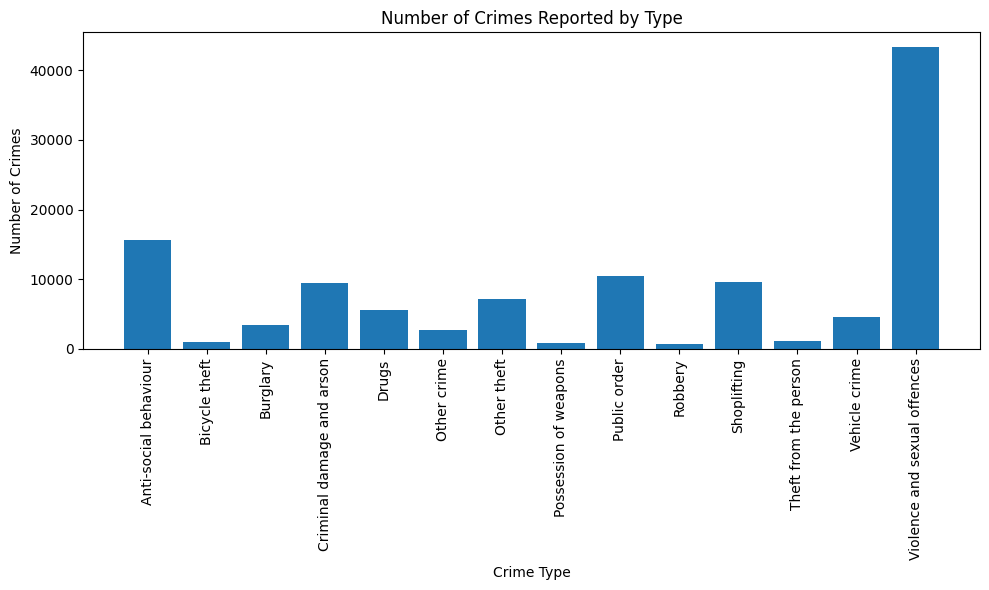

In [ ]:
# check the leading course of crime in UK with barchat

crime_counts = police.groupby('Crime type')['Crime type'].count()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(crime_counts.index, crime_counts.values)
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Reported by Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
crime_counts_by_force = police.groupby(['Reported by', 'Crime type'])['Crime type'].count().unstack()
crime_counts_by_force

Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Reported by,,,,,,,,,,,,,,
City of London Police,61,63,100,88,129,42,675,29,209,65,447,455,28,515
Merseyside Police,5840,321,1418,4311,3988,1289,2892,388,4786,395,3035,345,1894,19091
North Wales Police,4192,109,607,1884,502,428,1293,150,1427,72,1744,85,441,9392
South Wales Police,5525,443,1206,3089,924,985,2216,291,3983,134,4330,222,2142,14313


In [ ]:
# Calculate the total number of crimes reported by each force
total_crimes_by_force = crime_counts_by_force.iloc[:, 1:].sum(axis=1)

# Add the total crimes to the dataframe
crime_counts_by_force['Total Crimes'] = total_crimes_by_force

# Reset the index to make 'Reported by' a regular column
crime_counts_by_force = crime_counts_by_force.reset_index()

# Display the dataframe with the total crimes
crime_counts_by_force[['Reported by', 'Total Crimes']]

Crime type,Reported by,Total Crimes
0,City of London Police,2845
1,Merseyside Police,44153
2,North Wales Police,18134
3,South Wales Police,34278


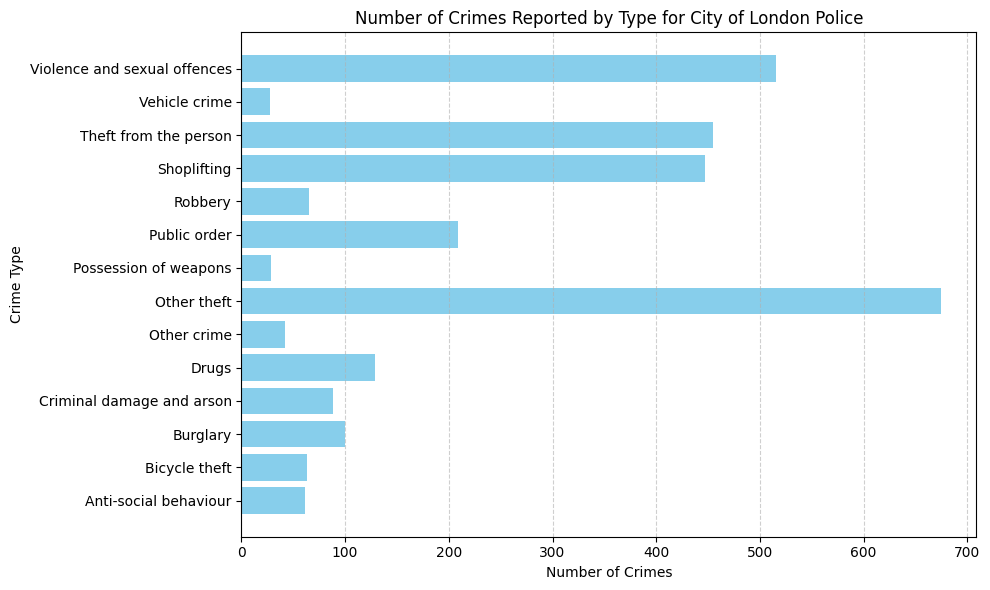

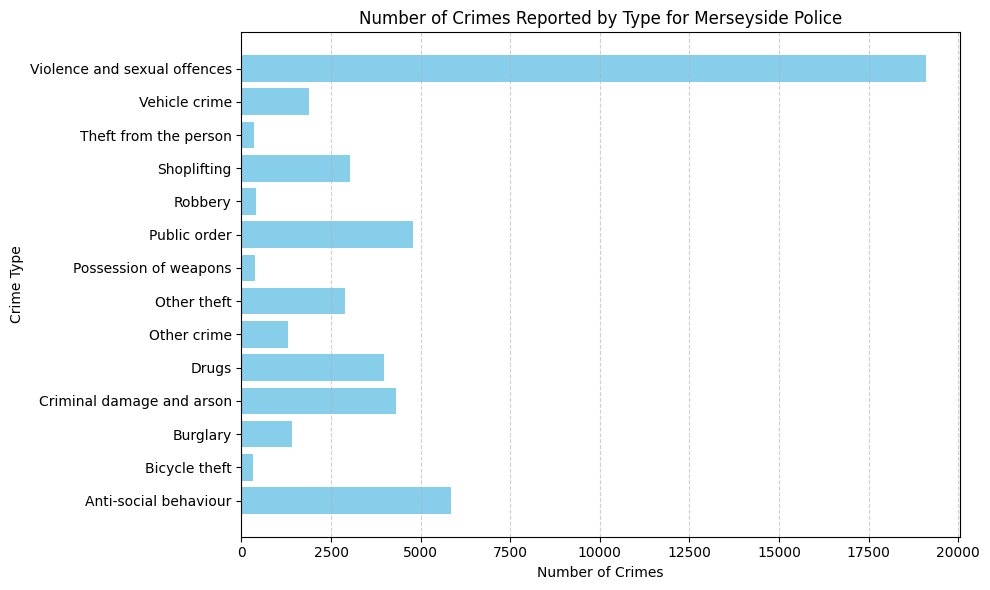

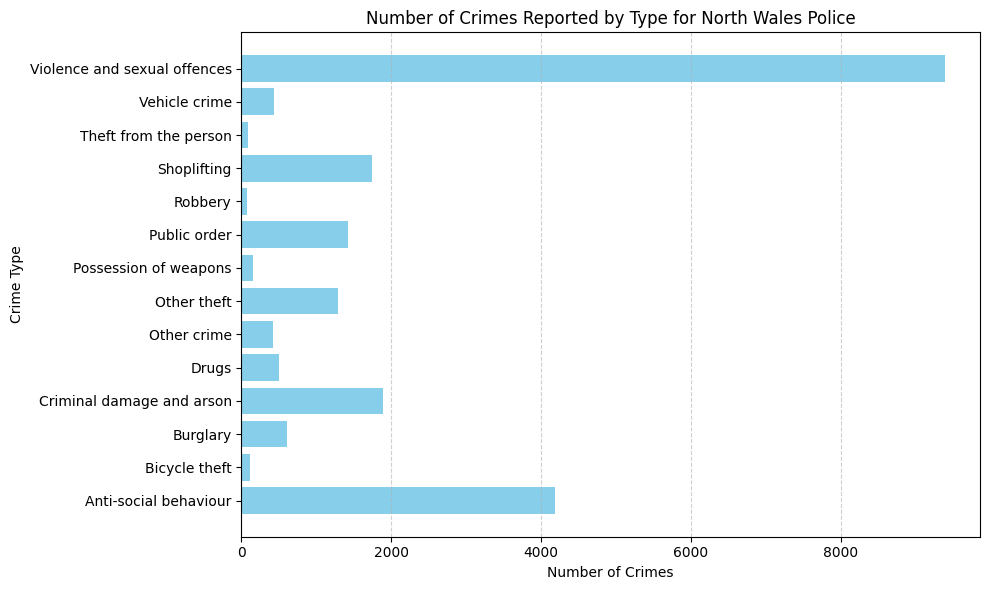

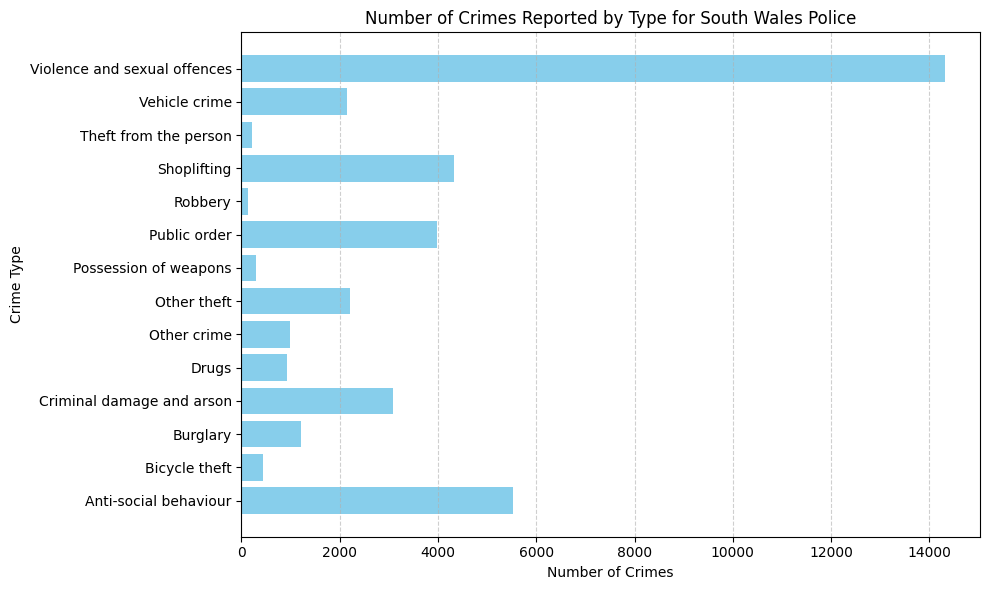

In [ ]:
#graph for each falls within leading crime report by differnt police services

# Group by 'Reported by' and 'Crime type' to get crime counts for each police force
crime_counts_by_force = police.groupby(['Reported by', 'Crime type'])['Crime type'].count().unstack()

# Iterate through each police force and create a separate bar chart

for force in crime_counts_by_force.index:
    crime_counts_for_force = crime_counts_by_force.loc[force].dropna()  # Remove NaN values

    plt.figure(figsize=(10, 6))
    plt.barh(crime_counts_for_force.index, crime_counts_for_force.values, color='skyblue')
    plt.xlabel('Number of Crimes')
    plt.ylabel('Crime Type')
    plt.title(f'Number of Crimes Reported by Type for {force}')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [ ]:
!pip install geopandas osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install folium

In [ ]:
import geopandas as gpd
import osmnx as ox
import folium
import random

In [ ]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[police["Latitude"].mean(), police["Longitude"].mean()], zoom_start=6)

marker_cluster = MarkerCluster().add_to(m)

for _, row in police.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(marker_cluster)

m